In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:/ML_LABS/train.csv" )
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
missing_value = data.isnull().sum()
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({
    'count_missing': missing_value,
    'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,count_missing,percent_missing
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Embarked,2,0.224467


In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[["Age"]] = imputer.fit_transform(data[["Age"]])

imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[["Embarked"]] = imputer2.fit_transform(data[["Embarked"]])

In [6]:
data2 = data.drop(["Cabin", "Ticket", "Name", "PassengerId"], axis=1)
data2 = pd.get_dummies(data2, columns=["Pclass", "Sex", "Embarked"])
data2

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


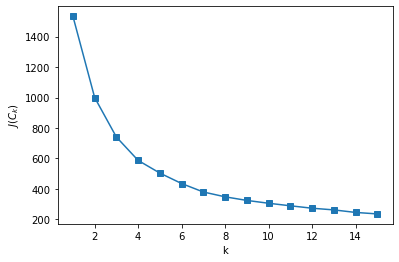

In [7]:
inertia = []
max_n_clusters = 15 
for k in range(1, max_n_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data2)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, max_n_clusters+1), inertia, marker='s');
plt.xlabel('k')
plt.ylabel('$J(C_k)$');


In [8]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(data2)
data['clusters'] = clusters
data["clusters"].value_counts()


0    725
2    135
1     28
3      3
Name: clusters, dtype: int64

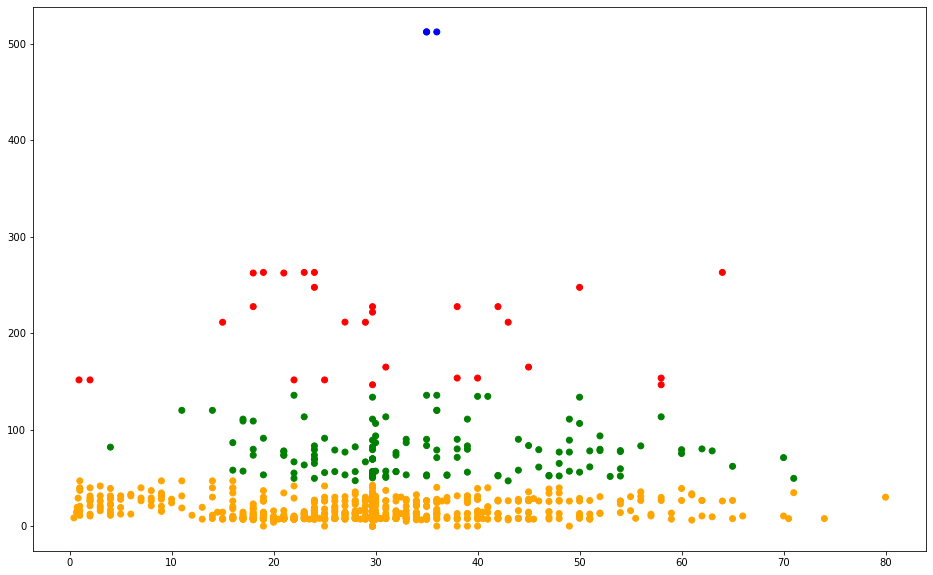

In [9]:
# sns.scatterplot(data=data, x="Age", y="Fare", hue="clusters")
plt.figure(figsize=[16, 10])
# fig, ax = plt.subplots()
colors = ['orange', 'red', 'green', 'blue']
plt.scatter(data['Age'], data['Fare'], c=data['clusters'].apply(lambda x: colors[x]))


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

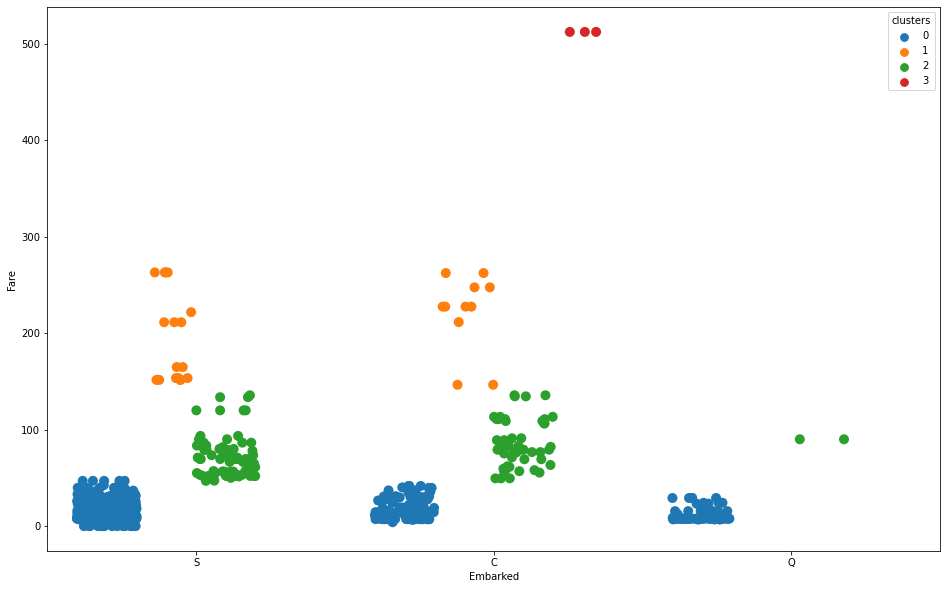

In [10]:
plt.figure(figsize=[16, 10])
sns.stripplot(data=data, x="Embarked", y="Fare", hue="clusters", jitter=0.4, size = 10, dodge = True)  

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

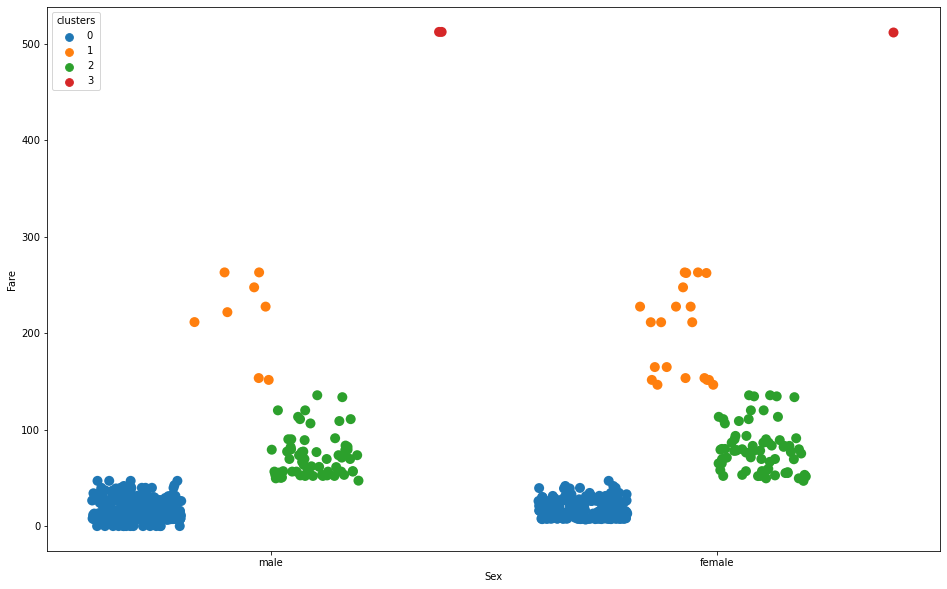

In [11]:
plt.figure(figsize=[16, 10])
sns.stripplot(data=data, x="Sex", y="Fare", hue="clusters", jitter=0.4, size = 10, dodge = True)  

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

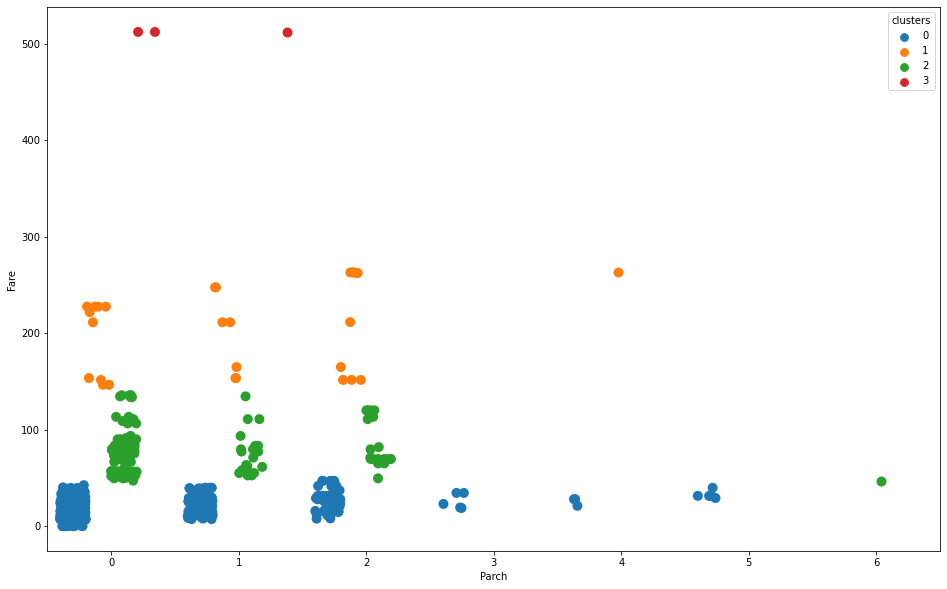

In [12]:
plt.figure(figsize=[16, 10])
sns.stripplot(data=data, x="Parch", y="Fare", hue="clusters", jitter=0.4, size = 10, dodge = True)  

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

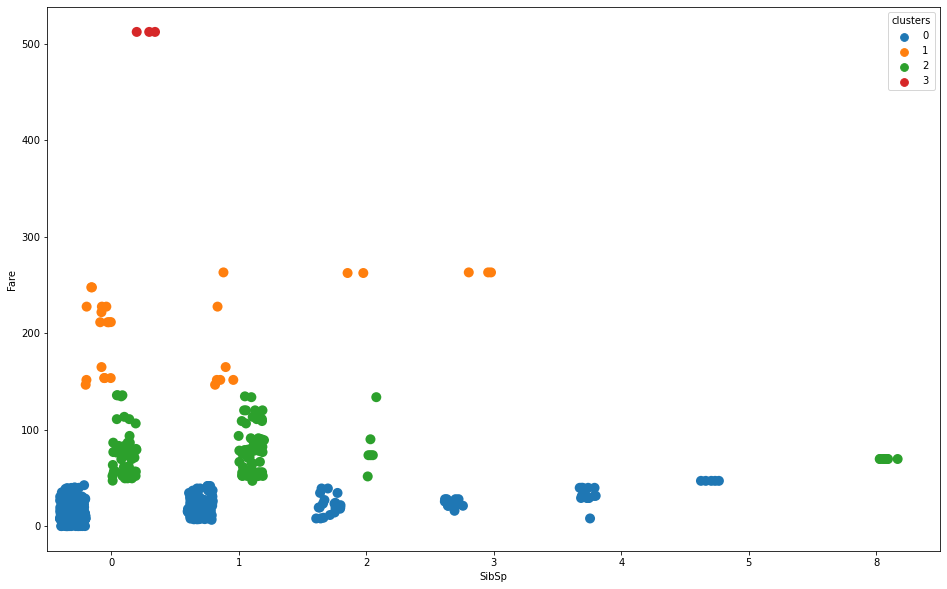

In [13]:
plt.figure(figsize=[16, 10])
sns.stripplot(data=data, x="SibSp", y="Fare", hue="clusters", jitter=0.4, size = 10, dodge = True) 

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

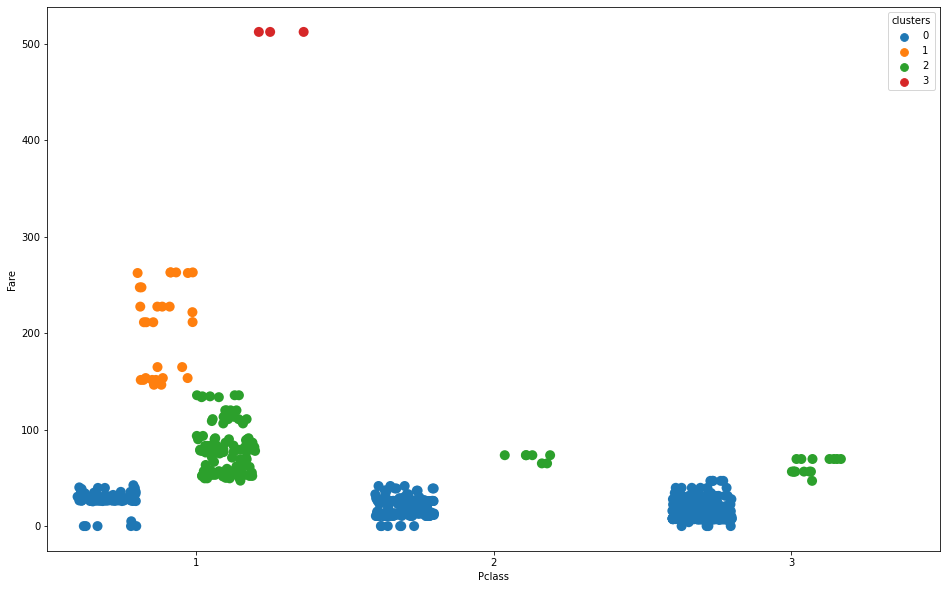

In [14]:
plt.figure(figsize=[16, 10])
sns.stripplot(data=data, x="Pclass", y="Fare", hue="clusters", jitter=0.4, size = 10, dodge = True) 

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

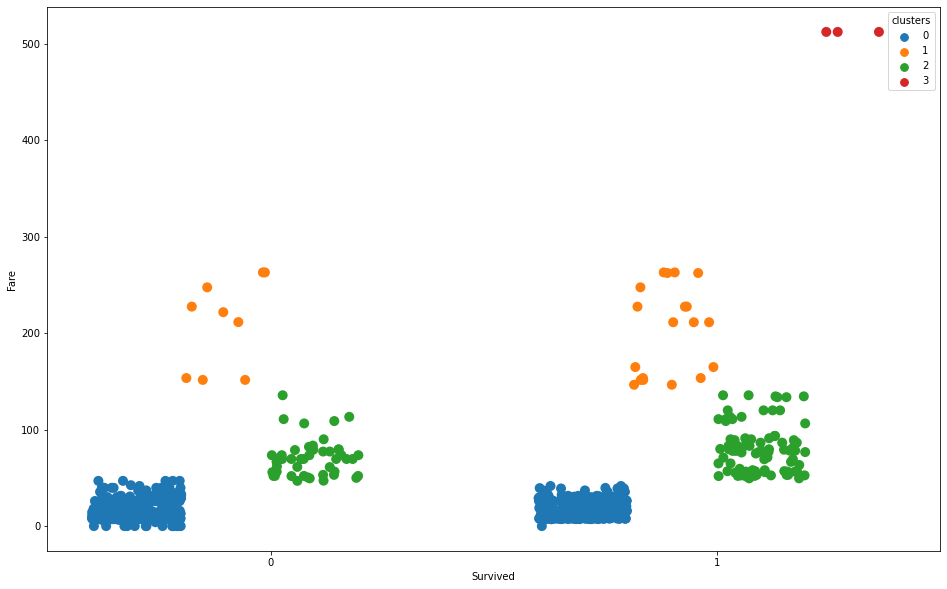

In [15]:
plt.figure(figsize=[16, 10])
sns.stripplot(data=data, x="Survived", y="Fare", hue="clusters", jitter=0.4, size = 10, dodge = True) 

# Conclusion

### Cluster 0

- most bought lowest price 1st class tickets
- embarked either in Southhampton or in Cherbourg
- 65% survived
- everyone has at least 1 family member on board

### Cluster 1

- with lowest ticket's price
- embarked in Southampton 
- most likely didn't survive
- most men
- with 3d class ticket

### Cluster 2

- most have bought very expensive 1st class tickets(probably in the last moment)
- everyone has at least 1 family member on board
- 65% to survive

### Cluster 3

- the most expansive ticket's price
- embarked in Cherbourg
- 100% of survivers
- noone has siblings